<a href="https://colab.research.google.com/github/Prazna/NLPBasics/blob/master/sms_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
1. Loading dependencies

In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt 
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
2. Loading Data

In [0]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [0]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [23]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [0]:
df.rename(columns = {'v1':'spam_ham','v2':'sms_text'}, inplace = True) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   spam_or_ham  5572 non-null   object
 1   sms_text     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [0]:
#Text pre-processing to remove punctuations and stop words

In [0]:
df['label'] = df.spam_ham.apply(lambda x: 1 if x =='spam' else 0)

In [58]:
df.drop(['spam_ham'],axis = 1)

,sms_text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [0]:
3. Train-Test Split

In [0]:
totalMails = df['sms_text'].shape[0]
trainIndex,testIndex = list(), list()
for i in range(df.shape[0]):
  if np.random.uniform(0,1) < 0.75:
    trainIndex += [i]
  else:
    testIndex += [i]


In [0]:
trainData = df.loc[trainIndex]
testData = df.loc[testIndex]

In [65]:
trainData.reset_index(inplace = True)
trainData.drop(['index'],axis = 1,inplace = True)
trainData.head()

,level_0,spam_ham,sms_text,label
0,0,ham,"Go until jurong point, crazy.. Available only ...",0
1,1,ham,Ok lar... Joking wif u oni...,0
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,3,ham,U dun say so early hor... U c already then say...,0
4,4,spam,FreeMsg Hey there darling it's been 3 week's n...,1


In [0]:
trainData.drop(['spam_ham'],axis = 1,inplace = True)

In [0]:
testData.drop(['spam_ham'],axis = 1,inplace = True)

In [73]:
testData.head()

,sms_text,label
4,"Nah I don't think he goes to usf, he lives aro...",0
8,WINNER!! As a valued network customer you have...,1
10,I'm gonna be home soon and i don't want to tal...,0
16,Oh k...i'm watching here:),0
20,Is that seriously how you spell his name?,0


In [0]:
4.Visualizing Data

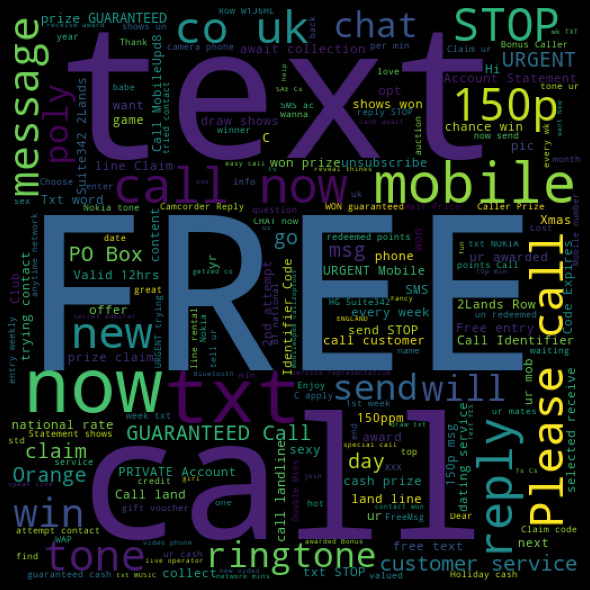

In [80]:
spam_words = ' '.join(list(df[df['label']==1]['sms_text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10,8), facecolor= 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()